In [1]:
import torch
import torchvision
from torch import nn
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from model import AutoEncoder
import pandas as pd

In [2]:
batch_size_train, batch_size_test = 100, 1000
device = torch.device('cuda:0')

In [6]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

In [7]:
train_set = torchvision.datasets.MNIST('./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST('./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size_train, num_workers=8, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size_test, num_workers=8)
train_size, test_size = len(train_set), len(test_set)

In [5]:
X, y = next(iter(train_loader))

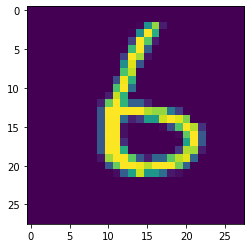

In [6]:
plt.imshow(X[3][0])
plt.show()

In [7]:
model = AutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [24]:
n_epochs = 100

In [25]:
train_loss, test_loss = [], []
for epoch in tqdm(range(n_epochs)):
    total_train_loss = 0
    for imgs, label in train_loader:
        imgs = imgs.to(device)
        output = model(imgs)
        loss = criterion(output, imgs)
        total_train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss.append(total_train_loss)

100%|██████████| 100/100 [06:18<00:00,  3.79s/it]


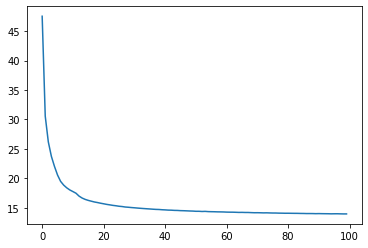

In [31]:
plt.plot(train_loss)
plt.show()

In [3]:
loaded = torch.load('./best_model.pth')

In [8]:
imgs, labels = next(iter(test_loader))

In [9]:
decoded = loaded(imgs.cuda()).cpu()

In [10]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

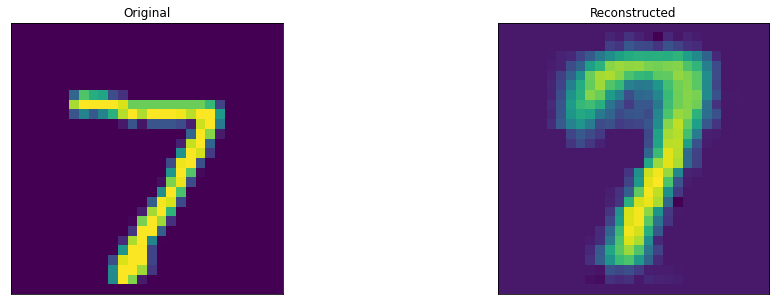

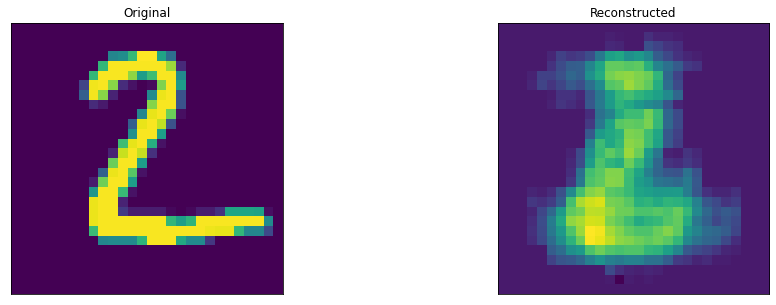

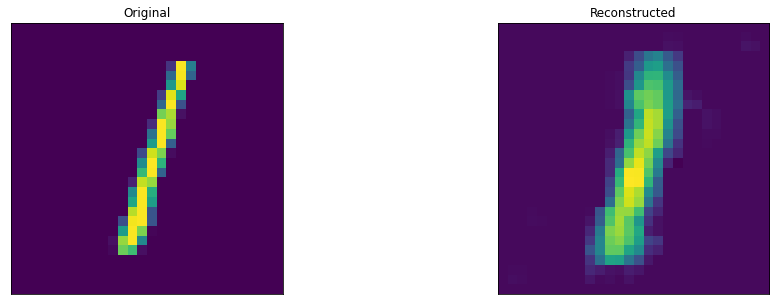

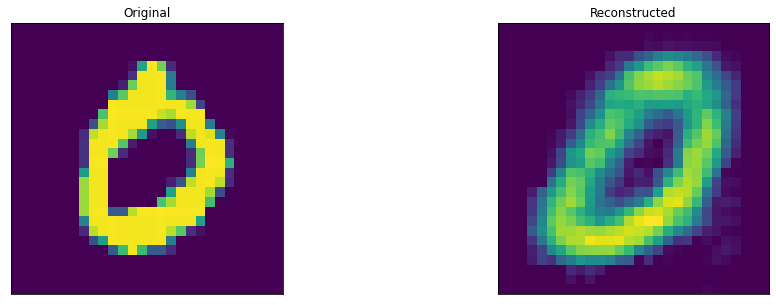

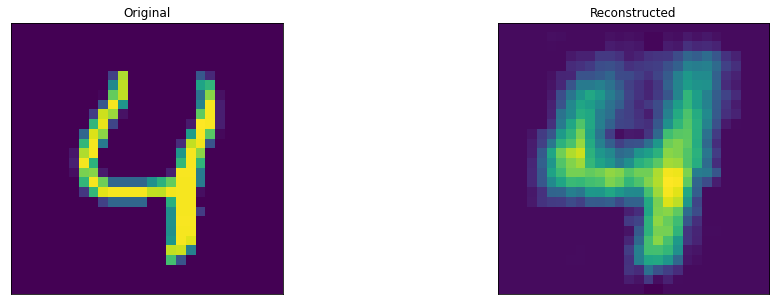

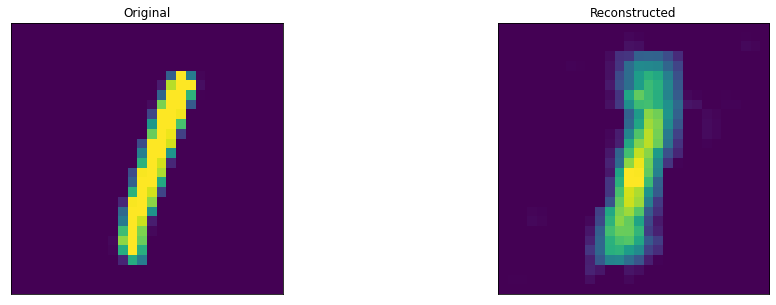

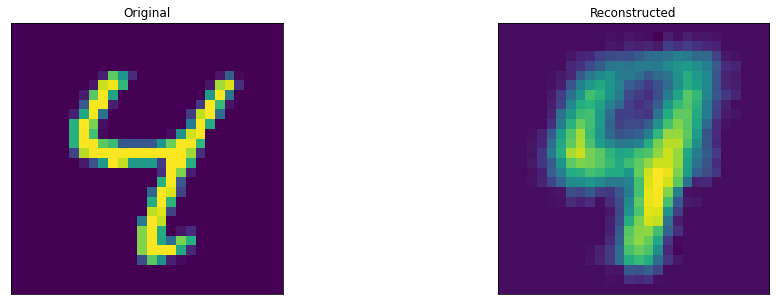

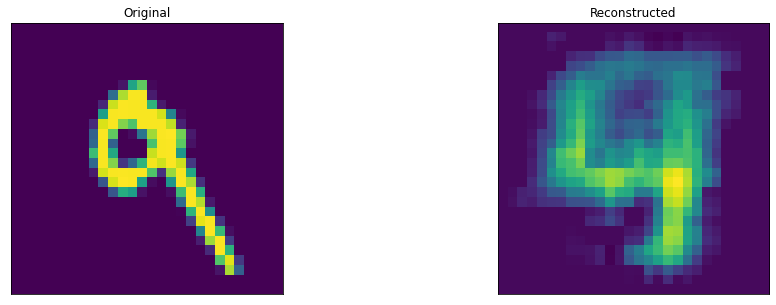

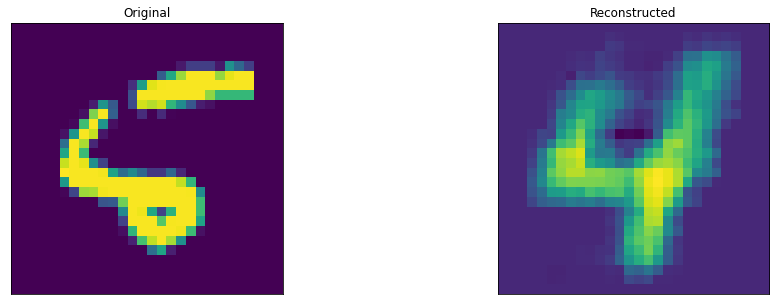

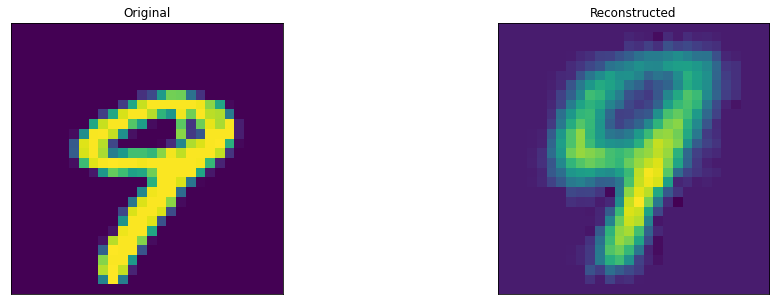

In [11]:
for i in range(10):
    visualize(
        original=imgs[i][0],
        reconstructed=decoded[i][0].detach()
    )

In [12]:
encoded = loaded.encode(imgs.cuda()).cpu()

In [14]:
encoded

tensor([[3.2287, 0.8788],
        [0.9273, 2.9220],
        [0.2668, 0.9225],
        ...,
        [3.4940, 4.1067],
        [2.8381, 3.1703],
        [3.5374, 1.7307]], grad_fn=<CopyBackwards>)

In [56]:
train = pd.read_csv('archive/emnist-digits-train.csv', header=None)

In [57]:
train

0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0         8    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1         9    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2         6    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3         3    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4         6    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
239995    4    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239996    2    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239997    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239998    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239999    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

        778  779  780  781  782  783  784  
0         0    0    0    0    0    0    0  
1         0    0    0    0    0    0    0  
2         0    0    0    0    0    0    0  
3         0    0    0    0    0    0    0  
4         0    0    0    0    0    0    0  
...     ...  ...  ...  ...  ...  ...  ...  
239995    0    0    0    0    0    0    0  
239996    0    0    0    0    0    0    0  
239997    0    0    0    0    0    0    0  
239998    0    0    0    0    0    0    0  
239999    0    0    0    0    0    0    0  

[240000 rows x 785 columns]

In [58]:
us = nn.Unflatten(-1, (28, 28))

In [77]:
len(train)

240000

In [78]:
len(train_loader.dataset)

60000

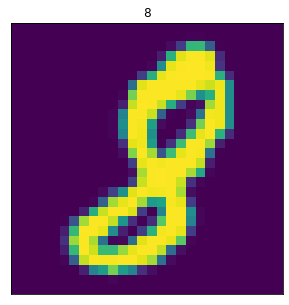

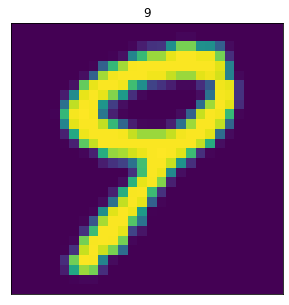

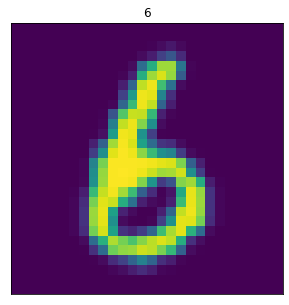

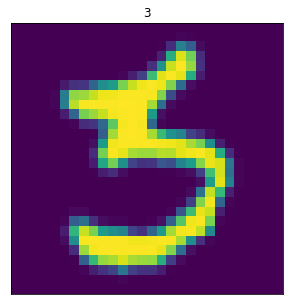

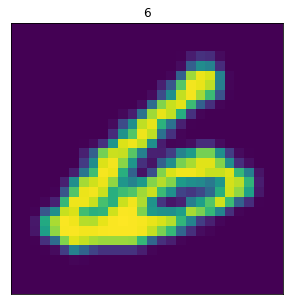

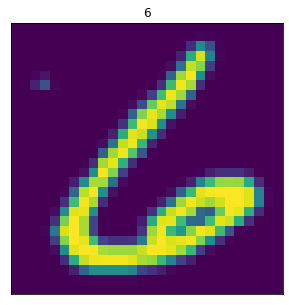

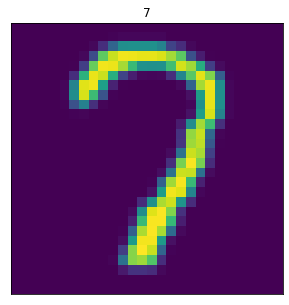

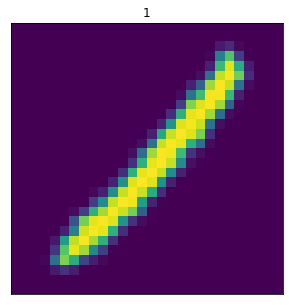

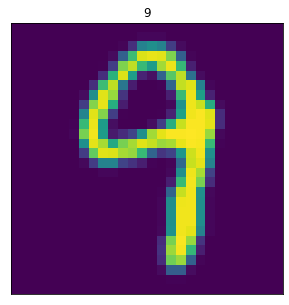

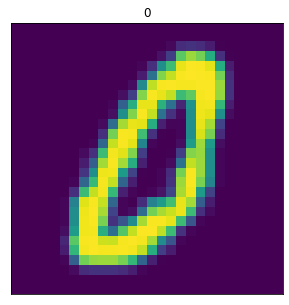

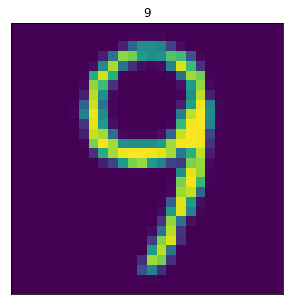

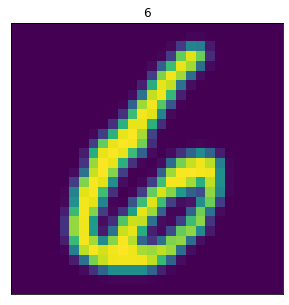

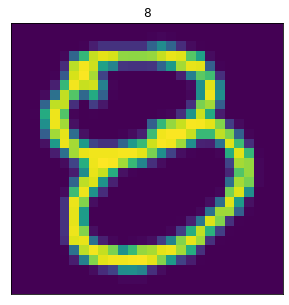

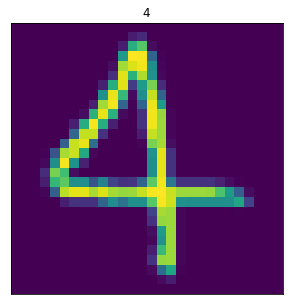

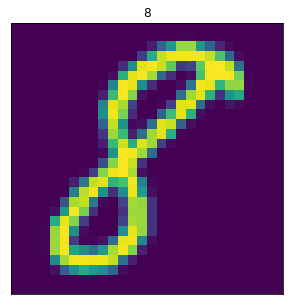

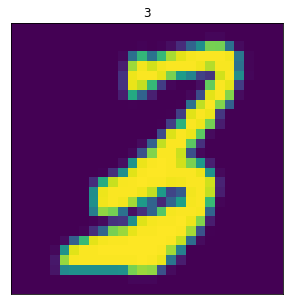

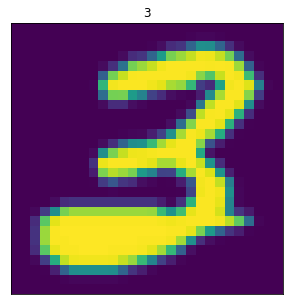

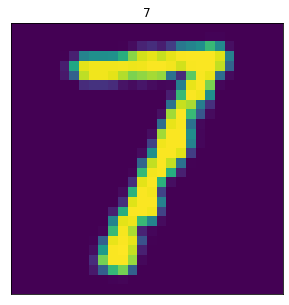

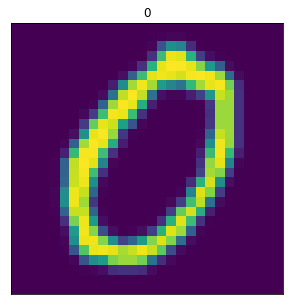

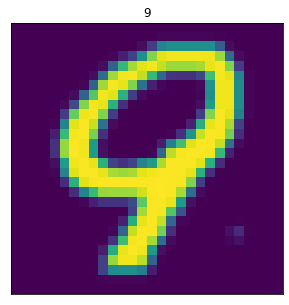

In [76]:
for i in range(20):
    row = train.iloc[i]
    label, img = row[0], row[1:]
    img = us(torch.tensor(img.values)).swapaxes(0, 1)
    dic = {str(label): img}
    visualize(**dic)

In [32]:
train.describe()

0         1         2         3         4              5    \
count  112800.00000  112800.0  112800.0  112800.0  112800.0  112800.000000   
mean       23.00000       0.0       0.0       0.0       0.0       0.001365   
std        13.56472       0.0       0.0       0.0       0.0       0.235046   
min         0.00000       0.0       0.0       0.0       0.0       0.000000   
25%        11.00000       0.0       0.0       0.0       0.0       0.000000   
50%        23.00000       0.0       0.0       0.0       0.0       0.000000   
75%        35.00000       0.0       0.0       0.0       0.0       0.000000   
max        46.00000       0.0       0.0       0.0       0.0      63.000000   

                 6              7              8              9    ...  \
count  112800.000000  112800.000000  112800.000000  112800.000000  ...   
mean        0.011560       0.020700       0.017438       0.018475  ...   
std         1.221826       1.658797       1.602478       1.719549  ...   
min         0.000000       0.000000       0.000000       0.000000  ...   
25%         0.000000       0.000000       0.000000       0.000000  ...   
50%         0.000000       0.000000       0.000000       0.000000  ...   
75%         0.000000       0.000000       0.000000       0.000000  ...   
max       192.000000     217.000000     217.000000     217.000000  ...   

                 775       776       777            778            779  \
count  112800.000000  112800.0  112800.0  112800.000000  112800.000000   
mean        0.000310       0.0       0.0       0.002163       0.000284   
std         0.104211       0.0       0.0       0.726499       0.095279   
min         0.000000       0.0       0.0       0.000000       0.000000   
25%         0.000000       0.0       0.0       0.000000       0.000000   
50%         0.000000       0.0       0.0       0.000000       0.000000   
75%         0.000000       0.0       0.0       0.000000       0.000000   
max        35.000000       0.0       0.0     244.000000      32.000000   

            780       781       782       783       784  
count  112800.0  112800.0  112800.0  112800.0  112800.0  
mean        0.0       0.0       0.0       0.0       0.0  
std         0.0       0.0       0.0       0.0       0.0  
min         0.0       0.0       0.0       0.0       0.0  
25%         0.0       0.0       0.0       0.0       0.0  
50%         0.0       0.0       0.0       0.0       0.0  
75%         0.0       0.0       0.0       0.0       0.0  
max         0.0       0.0       0.0       0.0       0.0  

[8 rows x 785 columns]

In [24]:
us(train[0])

AttributeError: 'Series' object has no attribute 'unflatten'